## 1. Introduction

## 2. Import Libraries And Dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, LSTM, RepeatVector, TimeDistributed, ConvLSTM2D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.utils import plot_model
import graphviz
from math import sqrt 
import matplotlib.pyplot as plt

In [2]:
#Load dataset 
file_path = "E:\\school subjects\\Predictive Analytics\\project\\data\\all_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()

,Date,Open,High,Low,Close,Volume
0,2008-12-29,2857.149902,2931.800049,2812.899902,2922.199951,0.0
1,2008-12-30,2922.550049,2999.149902,2899.750000,2979.500000,0.0
2,2008-12-31,2979.800049,3002.649902,2937.350098,2959.149902,0.0
3,2009-01-01,NaN,NaN,NaN,NaN,NaN
4,2009-01-02,3034.600098,3079.850098,3021.800049,3046.750000,0.0


In [3]:
# Hanlding missing values
data = data.fillna(method='ffill')
# Display the first few rows of the data after fill missing values
data.head()

C:\Users\nqduo\AppData\Local\Temp\ipykernel_18368\2973235747.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


,Date,Open,High,Low,Close,Volume
0,2008-12-29,2857.149902,2931.800049,2812.899902,2922.199951,0.0
1,2008-12-30,2922.550049,2999.149902,2899.750000,2979.500000,0.0
2,2008-12-31,2979.800049,3002.649902,2937.350098,2959.149902,0.0
3,2009-01-01,2979.800049,3002.649902,2937.350098,2959.149902,0.0
4,2009-01-02,3034.600098,3079.850098,3021.800049,3046.750000,0.0


## 3. Understanding Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2970 non-null   object 
 1   Open    2970 non-null   float64
 2   High    2970 non-null   float64
 3   Low     2970 non-null   float64
 4   Close   2970 non-null   float64
 5   Volume  2970 non-null   float64
dtypes: float64(5), object(1)
memory usage: 139.3+ KB


In [5]:
columns= data.columns.tolist()

In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,2970.000000,2970.000000,2970.000000,2970.000000,2.970000e+03
mean,7526.867158,7568.397934,7474.216428,7521.708556,1.642498e+05
std,2420.749863,2421.294534,2411.023680,2415.005484,1.939716e+05
min,2574.500000,2621.250000,2539.449951,2573.149902,0.000000e+00
25%,5443.062378,5485.162598,5403.762329,5440.149902,0.000000e+00
50%,7587.450195,7632.425049,7526.025146,7568.899902,1.470500e+05
75%,9435.875244,9479.549805,9365.274902,9405.699951,2.173500e+05
max,12430.500000,12430.500000,12321.400391,12362.299805,1.811000e+06


## 4. Preparing the Data

In [7]:
# Prepare training and testing data based on your date ranges
train_data = data[(data['Date'] >= '2008-12-29') & (data['Date'] <= '2018-12-28')]
test_data = data[(data['Date'] >= '2018-12-31') & (data['Date'] <= '2020-05-15')]

In [8]:
# Define function to create input sequences for model (either one-week or two-week lookback)
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 5):
        X.append(data['Open'].iloc[i:i+lookback].values)
        y.append(data['Open'].iloc[i+lookback:i+lookback+5].values)
    return np.array(X), np.array(y)

In [9]:
# Prepare data for Model
X_train_1, y_train_1 = create_sequences(train_data, lookback=5)
X_test_1, y_test_1 = create_sequences(test_data, lookback=5)

X_train_2, y_train_2 = create_sequences(train_data, lookback=10)
X_test_2, y_test_2 = create_sequences(test_data, lookback=10)

X_train_3, y_train_3 = create_sequences(train_data, lookback=10)
X_test_3, y_test_3 = create_sequences(test_data, lookback=10)

X_train_4, y_train_4 = create_sequences(train_data, lookback=10)
X_test_4, y_test_4 = create_sequences(test_data, lookback=10)

X_train_5, y_train_5 = create_sequences(train_data, lookback=10)
X_test_5, y_test_5 = create_sequences(test_data, lookback=10)

In [10]:
# Reshape data to fit Conv1D input (samples, time steps, features)
X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], 1))
X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], 1))

X_train_2 = X_train_2.reshape((X_train_2.shape[0], X_train_2.shape[1], 1))
X_test_2 = X_test_2.reshape((X_test_2.shape[0], X_test_2.shape[1], 1))

X_train_3 = X_train_3.reshape((X_train_3.shape[0], X_train_3.shape[1], 1))
X_test_3 = X_test_3.reshape((X_test_3.shape[0], X_test_3.shape[1], 1))

X_train_4 = X_train_4.reshape((X_train_4.shape[0], X_train_4.shape[1], 1))
X_test_4 = X_test_4.reshape((X_test_4.shape[0], X_test_4.shape[1], 1))

X_train_5 = X_train_5.reshape((X_train_5.shape[0], 2, 1, 5, 1))
X_test_5 = X_test_5.reshape((X_test_5.shape[0], 2, 1, 5, 1))


## 5. Modeling

### 5.1 CNN


In [11]:
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5))  # Predicting 5 days
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### 5.2 LSTM#1

In [12]:
def create_lstm_model(input_shape):
    model = Sequential()
    
    # Encoder LSTM
    model.add(LSTM(200, activation='relu', input_shape=input_shape))
    
    # Repeat Vector to repeat the encoded output for each time-step in the output sequence
    model.add(RepeatVector(5))
    
    # Decoder LSTM
    model.add(LSTM(200, activation='relu', return_sequences=True))
    
    # TimeDistributed layer to predict one day at each time-step
    model.add(TimeDistributed(Dense(100))),
    
    model.add(TimeDistributed(Dense(1)))
    
    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


### 5.3 LSTM#2

In [13]:
# Define CNN-LSTM encoder-decoder model architecture
def create_cnn_lstm_model(input_shape):
    model = Sequential()
    
    # CNN Encoder
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    
    # Repeat Vector for output sequence length
    model.add(RepeatVector(5))
    
    # LSTM Decoder
    model.add(LSTM(200, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(100))),
    
    model.add(TimeDistributed(Dense(1)))
    
    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### 5.4 LSTM#3

In [14]:
# Define ConvLSTM model architecture
def create_convlstm_model(input_shape):
    model = Sequential()
    
    # ConvLSTM layer
    model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', 
                         input_shape=input_shape, return_sequences=False))
    model.add(Flatten())
    
    # Repeat Vector for output sequence length
    model.add(RepeatVector(5))
    
    # LSTM decoder
    model.add(tf.keras.layers.LSTM(200, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(100))),
    
    model.add(TimeDistributed(Dense(1)))
    
    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

## 6. Evaluation

In [15]:
def evaluate_model_1(model, X_train, y_train, X_test, y_test, rounds=10):
    results = []

    for round_num in range(1, rounds + 1):
        start_time = time.time()
        
        # Train the model 
        model.fit(X_train, y_train, epochs=20, batch_size=4, verbose=0)
        
        # Make predictions
        predictions = model.predict(X_test)
        
        # Calculate RMSE for each day and overall
        overall_rmse = np.sqrt(mean_squared_error(y_test, predictions))
        day_rmse = [np.sqrt(mean_squared_error(y_test[:, i], predictions[:, i])) for i in range(5)]
        execution_time = time.time() - start_time
        
        # Append round results
        results.append([round_num, overall_rmse] + day_rmse + [execution_time])
    # Convert results to DataFrame
    df = pd.DataFrame(results, columns=["No.", "RMSE", "Mon", "Tue", "Wed", "Thu", "Fri", "Time"])
    
    # Calculate summary statistics
    summary = {
        "No.": ["Mean", "Min", "Max", "SD", "RMSE/Mean"],
        "RMSE": [
            df["RMSE"].mean(), df["RMSE"].min(), df["RMSE"].max(), df["RMSE"].std(),
            df["RMSE"].mean() / y_test.mean()  # RMSE / Mean of test 'open' values
        ],
        "Mon": [df["Mon"].mean(), df["Mon"].min(), df["Mon"].max(), df["Mon"].std(), df["Mon"].mean() / y_test[:, 0].mean()],
        "Tue": [df["Tue"].mean(), df["Tue"].min(), df["Tue"].max(), df["Tue"].std(), df["Tue"].mean() / y_test[:, 1].mean()],
        "Wed": [df["Wed"].mean(), df["Wed"].min(), df["Wed"].max(), df["Wed"].std(), df["Wed"].mean() / y_test[:, 2].mean()],
        "Thu": [df["Thu"].mean(), df["Thu"].min(), df["Thu"].max(), df["Thu"].std(), df["Thu"].mean() / y_test[:, 3].mean()],
        "Fri": [df["Fri"].mean(), df["Fri"].min(), df["Fri"].max(), df["Fri"].std(), df["Fri"].mean() / y_test[:, 4].mean()],
        "Time": [df["Time"].mean(), df["Time"].min(), df["Time"].max(), df["Time"].std(), np.nan]
    }
    
    # Append summary to DataFrame
    summary_df = pd.DataFrame(summary)
    results_df = pd.concat([df, summary_df], ignore_index=True)
    
    return results_df

In [16]:
def evaluate_model_2(model, X_train, y_train, X_test, y_test, rounds=10):
    results = []

    for round_num in range(1, rounds + 1):
        start_time = time.time()
        
        # Train the model
        model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
        
        # Make predictions
        predictions = model.predict(X_test)
        
        # Reshape predictions and y_test for RMSE calculation per day
        predictions = predictions.reshape(predictions.shape[0], predictions.shape[1])
        y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])
        
        # Calculate RMSE for each day and overall
        overall_rmse = np.sqrt(mean_squared_error(y_test, predictions))
        day_rmse = [np.sqrt(mean_squared_error(y_test[:, i], predictions[:, i])) for i in range(5)]
        execution_time = time.time() - start_time
        
        # Append round results
        results.append([round_num, overall_rmse] + day_rmse + [execution_time])

    # Convert results to DataFrame
    df = pd.DataFrame(results, columns=["No.", "RMSE", "Mon", "Tue", "Wed", "Thu", "Fri", "Time"])
    
    # Calculate summary statistics
    summary = {
        "No.": ["Mean", "Min", "Max", "SD", "RMSE/Mean"],
        "RMSE": [
            df["RMSE"].mean(), df["RMSE"].min(), df["RMSE"].max(), df["RMSE"].std(),
            df["RMSE"].mean() / y_test.mean()  # RMSE / Mean of test 'open' values
        ],
        "Mon": [df["Mon"].mean(), df["Mon"].min(), df["Mon"].max(), df["Mon"].std(), df["Mon"].mean() / y_test[:, 0].mean()],
        "Tue": [df["Tue"].mean(), df["Tue"].min(), df["Tue"].max(), df["Tue"].std(), df["Tue"].mean() / y_test[:, 1].mean()],
        "Wed": [df["Wed"].mean(), df["Wed"].min(), df["Wed"].max(), df["Wed"].std(), df["Wed"].mean() / y_test[:, 2].mean()],
        "Thu": [df["Thu"].mean(), df["Thu"].min(), df["Thu"].max(), df["Thu"].std(), df["Thu"].mean() / y_test[:, 3].mean()],
        "Fri": [df["Fri"].mean(), df["Fri"].min(), df["Fri"].max(), df["Fri"].std(), df["Fri"].mean() / y_test[:, 4].mean()],
        "Time": [df["Time"].mean(), df["Time"].min(), df["Time"].max(), df["Time"].std(), np.nan]
    }
    
    # Append summary to DataFrame
    summary_df = pd.DataFrame(summary)
    results_df = pd.concat([df, summary_df], ignore_index=True)
    
    return results_df

### 6.1 CNN#1

In [17]:
cnn_model_1 = create_cnn_model(input_shape=(5, 1))
results_df_1 = evaluate_model_1(cnn_model_1, X_train_1, y_train_1, X_test_1, y_test_1)
print(results_df_1)

C:\Users\nqduo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
          No.        RMSE         Mon         Tue         Wed         Thu  \
0           1  377.247230  289.443554  335.137658  383.069579  410.891894   
1           2  371.353015  276.534688  322.893869  373.885688  409.894191   
2           3  371.583171  274.847414  320.918230  378.200428  410.289060   
3           4  367.166255  268.177738  317.225122  365.363091  409.163104   
4           5  361.629936  264.585611  314.211737  360.294558  399.729381   
5           6  364.336491  275.428862  315.958158  366.392910  402.004625   
6           7  357.769021  258.388048  302.722775  358.69

In [18]:
results_df_1.to_csv('CNN#1_results.csv', index=False)

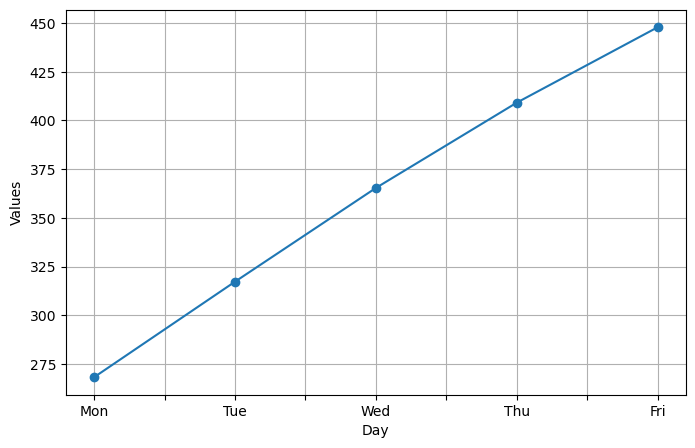

In [21]:
df_1 = results_df_1.drop('No.',axis=1)
df_1 = df_1.drop('Time',axis=1)
df_1 = df_1.drop('RMSE',axis=1)
df_1.iloc[3]
plt.figure(figsize=(8, 5))
df_1.iloc[3].plot(kind='line', marker='o', grid=True)
plt.xlabel('Day')
plt.ylabel('Values')
plt.show()

### 6.2 CNN#2

In [17]:
cnn_model_2 = create_cnn_model(input_shape=(10, 1))
results_df_2 = evaluate_model_1(cnn_model_2, X_train_2, y_train_2, X_test_2, y_test_2)
print(results_df_2)

C:\Users\nqduo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
          No.        RMSE         Mon         Tue         Wed         Thu  \
0           1  410.994567  284.944107  335.595097  450.383686  456.484094   
1           2  388.033915  238.588367  339.319667  390.350247  462.406155   
2           3  346.901987  204.240659  279.569184  350.000927  419.214856   
3           4  357.177919  257.785652  310.873445  360.908977  388.004275   
4           5  310.234831  189.652864  254.233862  310.276127  355.598898   
5           6  354.088921  288.792537  325.202536  324.536998  388.347951   
6           7  311.071057  196.302792  257.830380  307.793

In [23]:
results_df_2.to_csv('CNN#2_results.csv', index=False)

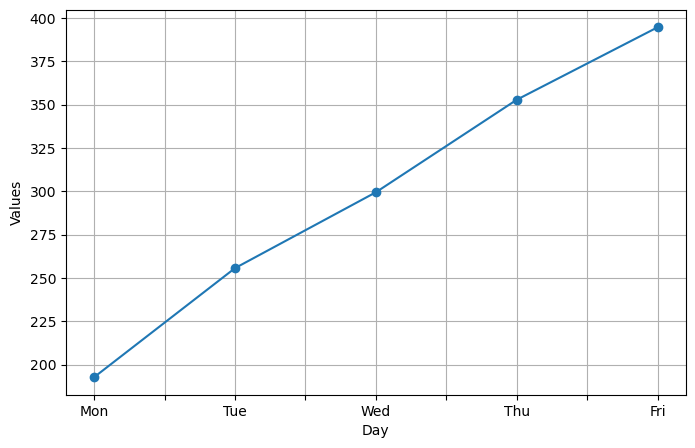

In [24]:
df_2 = results_df_2.drop('No.',axis=1)
df_2 = df_2.drop('Time',axis=1)
df_2 = df_2.drop('RMSE',axis=1)
df_2.iloc[5]
plt.figure(figsize=(8, 5))
df_2.iloc[5].plot(kind='line', marker='o', grid=True)
plt.xlabel('Day')
plt.ylabel('Values')
plt.show()

### 6.3 LSTM#1

In [18]:
lstm_model_1 = create_lstm_model(input_shape=(10, 1))
results_df_3 = evaluate_model_2(lstm_model_1, X_train_3, y_train_3, X_test_3, y_test_3)
print(results_df_3)

C:\Users\nqduo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
          No.        RMSE         Mon         Tue         Wed         Thu  \
0           1  463.497327  370.877162  414.379193  459.498165  503.909817   
1           2  417.220933  331.974520  371.630867  414.728067  448.404499   
2           3  329.272946  231.543984  286.954448  328.083615  365.773831   
3           4  343.295624  206.912527  285.310648  342.087482  386.895833   
4           5  283.050070  171.748150  232.158088  278.762297  320.468315   
5           6  276.399485  159.437923  220.110246  272.241428  314.483367   
6           7  273.647505  157.201961  217.403714  268.447838 

In [26]:
results_df_3.to_csv('LSTM#1_results.csv', index=False)

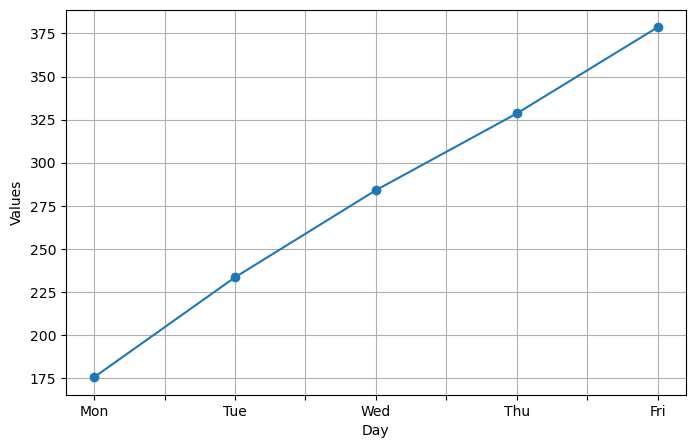

In [27]:
df_3 = results_df_3.drop('No.',axis=1)
df_3 = df_3.drop('Time',axis=1)
df_3 = df_3.drop('RMSE',axis=1)
df_3.iloc[4]
plt.figure(figsize=(8, 5))
df_3.iloc[4].plot(kind='line', marker='o', grid=True)
plt.xlabel('Day')
plt.ylabel('Values')
plt.show()

### 6.4 LSTM#2

In [19]:
cnn_lstm_model_2 = create_cnn_lstm_model(input_shape=(10, 1))
results_df_4 = evaluate_model_2(cnn_lstm_model_2, X_train_4, y_train_4, X_test_4, y_test_4)
print(results_df_4)

C:\Users\nqduo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
          No.        RMSE         Mon         Tue         Wed         Thu  \
0           1  421.096600  326.037127  378.829885  416.078213  458.136008   
1           2  393.404788  296.832766  346.120015  392.907669  434.608190   
2           3  355.237128  252.221370  301.679931  350.992074  398.556012   
3           4  321.845692  209.084286  266.581031  315.796911  366.835376   
4           5  320.615815  219.274824  269.323416  312.740514  362.190978   
5           6  334.690632  219.775107  277.917545  330.914494  380.620860   
6           7  321.050081  204.760273  265.950976  315.143821

In [29]:
results_df_4.to_csv('LSTM#2_results.csv', index=False)

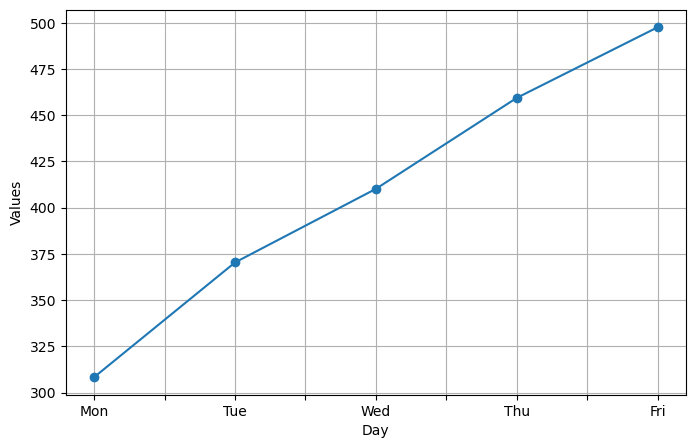

In [30]:
df_4 = results_df_4.drop('No.',axis=1)
df_4 = df_4.drop('Time',axis=1)
df_4 = df_4.drop('RMSE',axis=1)
df_4.iloc[2]
plt.figure(figsize=(8, 5))
df_4.iloc[2].plot(kind='line', marker='o', grid=True)
plt.xlabel('Day')
plt.ylabel('Values')
plt.show()

### 6.5 LSTM#3

In [23]:
convlstm_model = create_convlstm_model(input_shape=(2, 1, 5, 1))
results_df_5 = evaluate_model_2(convlstm_model, X_train_5, y_train_5, X_test_5, y_test_5)
print(results_df_5)

C:\Users\nqduo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
          No.        RMSE         Mon         Tue         Wed         Thu  \
0           1  373.792295  259.851076  327.535221  373.242573  421.380895   
1           2  309.820892  198.405151  256.085621  304.727465  352.565301   
2           3  305.705431  201.678337  250.248028  296.438748  345.789489   
3           4  299.139024  175.712407  239.883004  292.078145  342.849630   
4           5  316.127466  202.704932  270.742576  314.071214  355.679996   
5           6  299.632889  198.786166  255.211200  293.389559  337.513907   
6           7  308.456461  196.990468  257.368864  303.284304

In [32]:
results_df_5.to_csv('LSTM#3_results.csv', index=False)

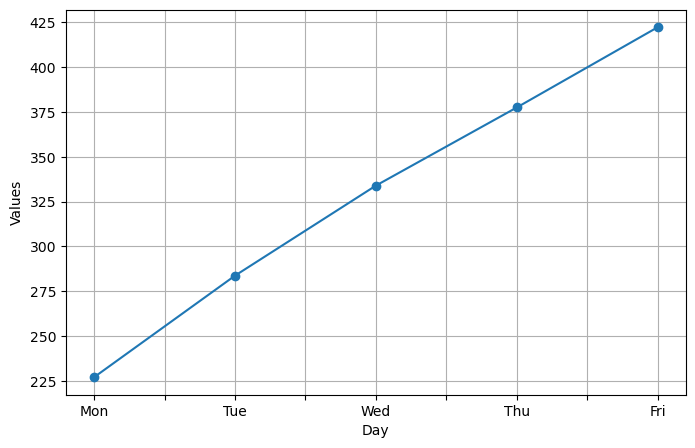

In [33]:
df_5 = results_df_5.drop('No.',axis=1)
df_5 = df_5.drop('Time',axis=1)
df_5 = df_5.drop('RMSE',axis=1)
df_5.iloc[7]
plt.figure(figsize=(8, 5))
df_5.iloc[7].plot(kind='line', marker='o', grid=True)
plt.xlabel('Day')
plt.ylabel('Values')
plt.show()